## Pokemon Stats Analysis and ML Project

### Import Libraries

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

from scipy.stats import ttest_ind
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

plt.style.use('ggplot')

### Load Data

In [48]:
pokemon_df = pd.read_csv('data/pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Exploratory Data Analysis

In [49]:
# Check nulls and dtypes
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [50]:
pokemon_df.isnull().mean()

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

In [51]:
# Display summary statistics
pokemon_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Data Cleaning

In [52]:
# Fill NA's for `Type 2`
pokemon_df['Type 2'] = pokemon_df['Type 2'].fillna('')

# Drop unecessary coluns
pokemon = pokemon_df.drop(['#','Total', 'Generation', 'Legendary'], axis=1)
pokemon.head(2)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60


#### Statistical Analysis

In [53]:
# Mean and Median of Attack and Defense
mean_attack = pokemon.Attack.mean()
mean_defense = pokemon.Defense.mean()
median_attack = pokemon.Attack.median()
median_defense = pokemon.Defense.median()

print(f"Mean Attack: {mean_attack:.2f}")
print(f"Mean Defense: {mean_defense:.2f}")
print(f"Median Attack: {median_attack:.2f}")
print(f"Median Defense: {median_defense:.2f}")

Mean Attack: 79.00
Mean Defense: 73.84
Median Attack: 75.00
Median Defense: 70.00


In [54]:
# Mean and Median of HP and Speed
mean_hp = pokemon.HP.mean()
mean_speed = pokemon.Speed.mean()
median_hp = pokemon.HP.median()
median_speed = pokemon.Speed.median()

print(f"Mean Attack: {mean_hp:.2f}")
print(f"Mean Defense: {mean_speed:.2f}")
print(f"Median Attack: {median_hp:.2f}")
print(f"Median Defense: {median_speed:.2f}")

Mean Attack: 69.26
Mean Defense: 68.28
Median Attack: 65.00
Median Defense: 65.00


In [55]:
# Standard Deviations
std_attack = pokemon.Attack.std()
std_defense = pokemon.Defense.std()
std_hp = pokemon.HP.std()
std_speed = pokemon.Speed.std()

print(f"Standard Deviation of Attack: {std_attack:.2f}")
print(f"Standard Deviation of Defense: {std_defense:.2f}")
print(f"Standard Deviation of HP: {std_hp:.2f}")
print(f"Standard Deviation of Speed: {std_speed:.2f}")

Standard Deviation of Attack: 32.46
Standard Deviation of Defense: 31.18
Standard Deviation of HP: 25.53
Standard Deviation of Speed: 29.06


In [56]:
# Filter the data for the generations of interest
generation_1_attack = pokemon_df[pokemon_df["Generation"] == 1]["Attack"]
generation_2_attack = pokemon_df[pokemon_df["Generation"] == 2]["Attack"]
generation_3_attack = pokemon_df[pokemon_df["Generation"] == 3]["Attack"]

# Perform t-test for Attack stat between Generation 1 and Generation 2
t_stat, p_value = ttest_ind(generation_1_attack, generation_2_attack)

# Print the results
print("Gen 1 and Gen 2 T-statistic for Attack Attribute:", t_stat)
print("Gen 1 and Gen 2 p-value for Attack Attribute:", p_value)

# Perform t-test for Attack stat between Generation 1 and Generation 3
t_stat, p_value = ttest_ind(generation_1_attack, generation_3_attack)

# Print the results
print("Gen 1 and Gen 3 T-statistic for Attack Attribute:", t_stat)
print("Gen 1 and Gen 3 p-value for Attack Attribute:", p_value)

Gen 1 and Gen 2 T-statistic for Attack Attribute: 1.1763035045816723
Gen 1 and Gen 2 p-value for Attack Attribute: 0.24050968418101457
Gen 1 and Gen 3 T-statistic for Attack Attribute: -1.333905980818188
Gen 1 and Gen 3 p-value for Attack Attribute: 0.18317154297248378


#### Data Visualizations

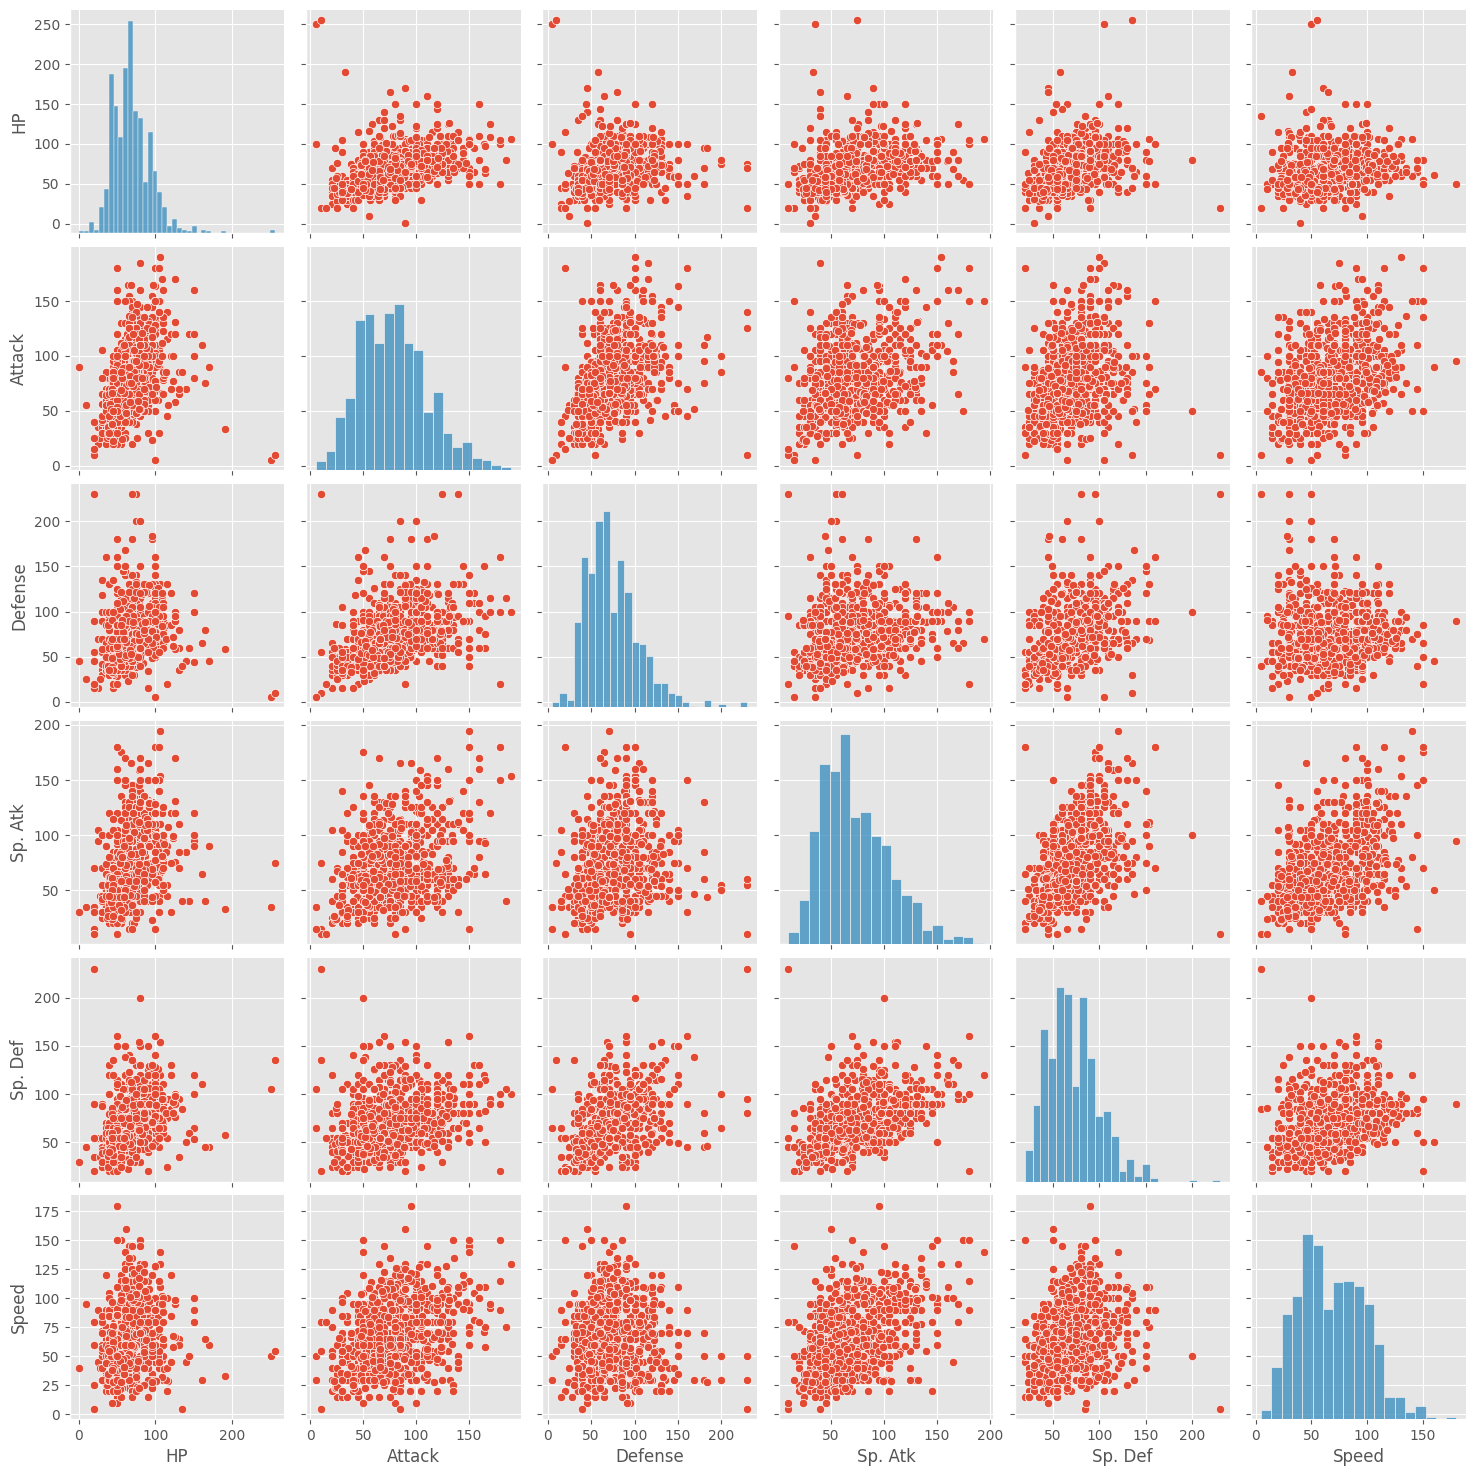

In [57]:
# Create pair plot to explore relatonship between variables
sns.pairplot(data=pokemon)

c:\Users\JacobJohnson\anaconda3\envs\vizenv\lib\site-packages\seaborn\categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



<AxesSubplot: title={'center': 'Feature Distribution'}>

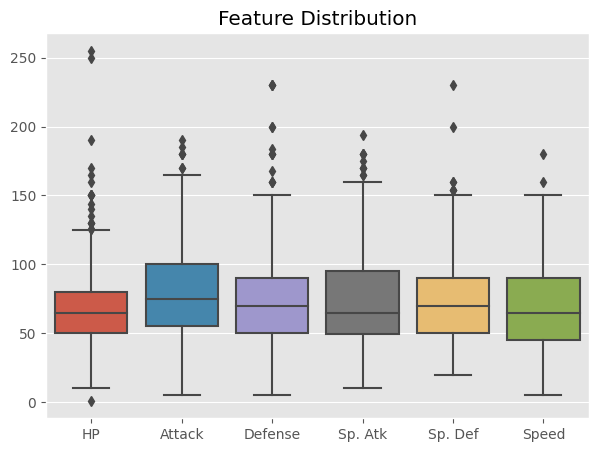

In [58]:
# Create boxplot so show the distributions of our features
plt.figure(figsize=(7, 5))
plt.title("Feature Distribution")
sns.boxplot(data=pokemon)

In [59]:
pokemon.groupby(['Type 1'])["Attack", "Defense", "Speed"].mean()

C:\Users\JacobJohnson\AppData\Local\Temp\ipykernel_13080\273746851.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Attack,Defense,Speed
Type 1,,,
Bug,70.971014,70.724638,61.681159
Dark,88.387097,70.225806,76.161290
Dragon,112.125000,86.375000,83.031250
Electric,69.090909,66.295455,84.500000
Fairy,61.529412,65.705882,48.588235
Fighting,96.777778,65.925926,66.074074
Fire,84.769231,67.769231,74.442308
Flying,78.750000,66.250000,102.500000
Ghost,73.781250,81.187500,64.343750


<AxesSubplot: title={'center': 'Type 1 Attack Distribution'}, xlabel='Attack', ylabel='Type 1'>

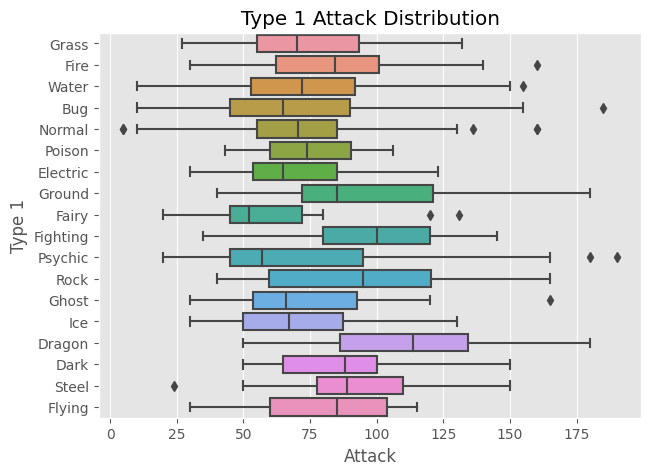

In [60]:
# Create boxplot so show the distributions of Type 1 Attack stats
plt.figure(figsize=(7, 5))
plt.title("Type 1 Attack Distribution")
sns.boxplot(data=pokemon, x="Attack", y="Type 1")

<AxesSubplot: title={'center': 'Type 2 Attack Distribution'}, xlabel='Attack', ylabel='Type 2'>

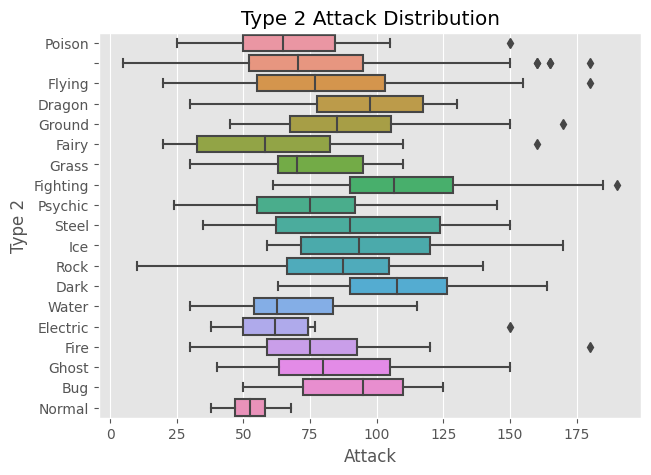

In [61]:
# Create boxplot so show the distributions of Type 2 Attack stats
plt.figure(figsize=(7, 5))
plt.title("Type 2 Attack Distribution")
sns.boxplot(data=pokemon, x="Attack", y="Type 2")

<AxesSubplot: title={'center': 'Type 1 Defense Distribution'}, xlabel='Defense', ylabel='Type 1'>

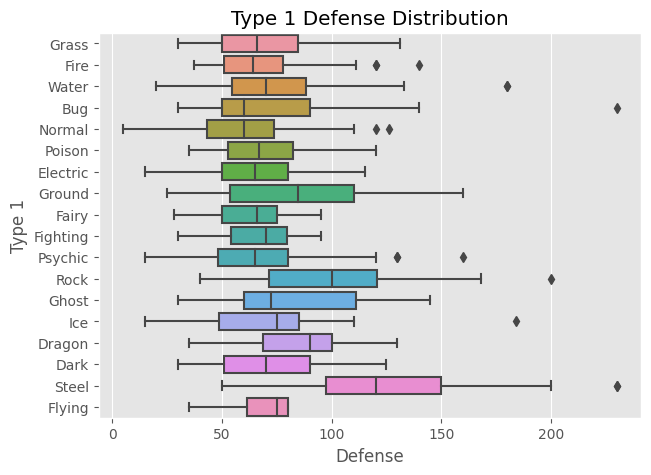

In [62]:
# Create boxplot so show the distributions of Type 1 Defense stats
plt.figure(figsize=(7, 5))
plt.title("Type 1 Defense Distribution")
sns.boxplot(data=pokemon, x="Defense", y="Type 1")

<AxesSubplot: title={'center': 'Type 2 Defense Distribution'}, xlabel='Defense', ylabel='Type 2'>

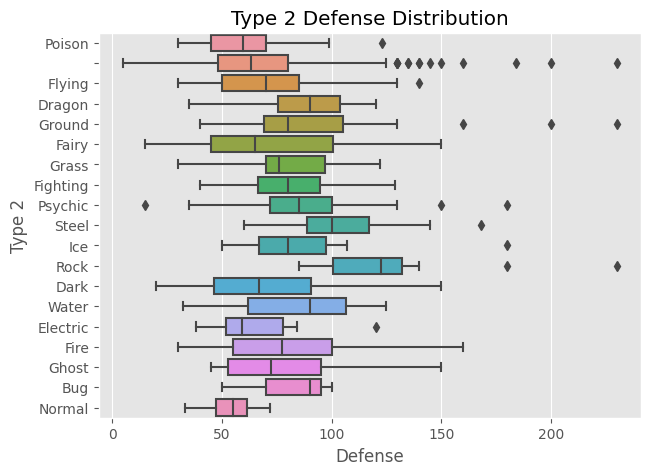

In [63]:
# Create boxplot so show the distributions of Type 2 Attack stats
plt.figure(figsize=(7, 5))
plt.title("Type 2 Defense Distribution")
sns.boxplot(data=pokemon, x="Defense", y="Type 2")

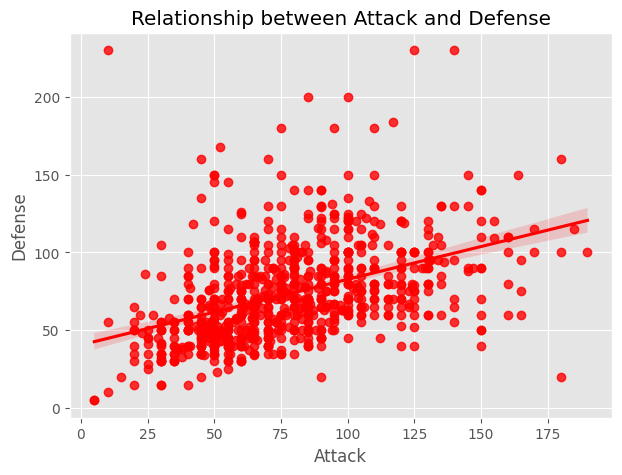

In [64]:
# Create scatter plot plot to show relationship between attack and defense
plt.figure(figsize=(7, 5))
plt.title("Relationship between Attack and Defense")
sns.regplot(data=pokemon, x="Attack", y="Defense", color="r")
plt.show()

C:\Users\JacobJohnson\AppData\Local\Temp\ipykernel_13080\2438730780.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



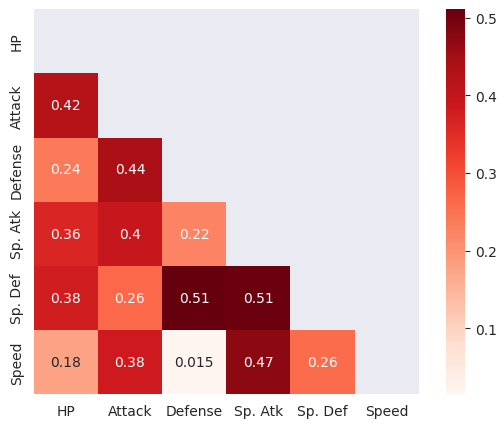

In [65]:
# Using Pearson Correlation to find relation between our variables
corr = pokemon.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap='Reds', annot=True)

In [66]:
# Group pokemon by type and and find the statistical averages
stats_avg = pokemon.groupby(['Type 1'])["HP", "Attack", "Defense", "Speed", "Sp. Atk", "Sp. Def"].mean().reset_index()
stats_avg_2 = pokemon.groupby(['Type 2'])["HP", "Attack", "Defense", "Speed", "Sp. Atk", "Sp. Def"].mean().reset_index()
stats_avg.head()

C:\Users\JacobJohnson\AppData\Local\Temp\ipykernel_13080\1086365847.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\JacobJohnson\AppData\Local\Temp\ipykernel_13080\1086365847.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Type 1,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def
0,Bug,56.884058,70.971014,70.724638,61.681159,53.869565,64.797101
1,Dark,66.806452,88.387097,70.225806,76.161290,74.645161,69.516129
2,Dragon,83.312500,112.125000,86.375000,83.031250,96.843750,88.843750
3,Electric,59.795455,69.090909,66.295455,84.500000,90.022727,73.704545
4,Fairy,74.117647,61.529412,65.705882,48.588235,78.529412,84.705882


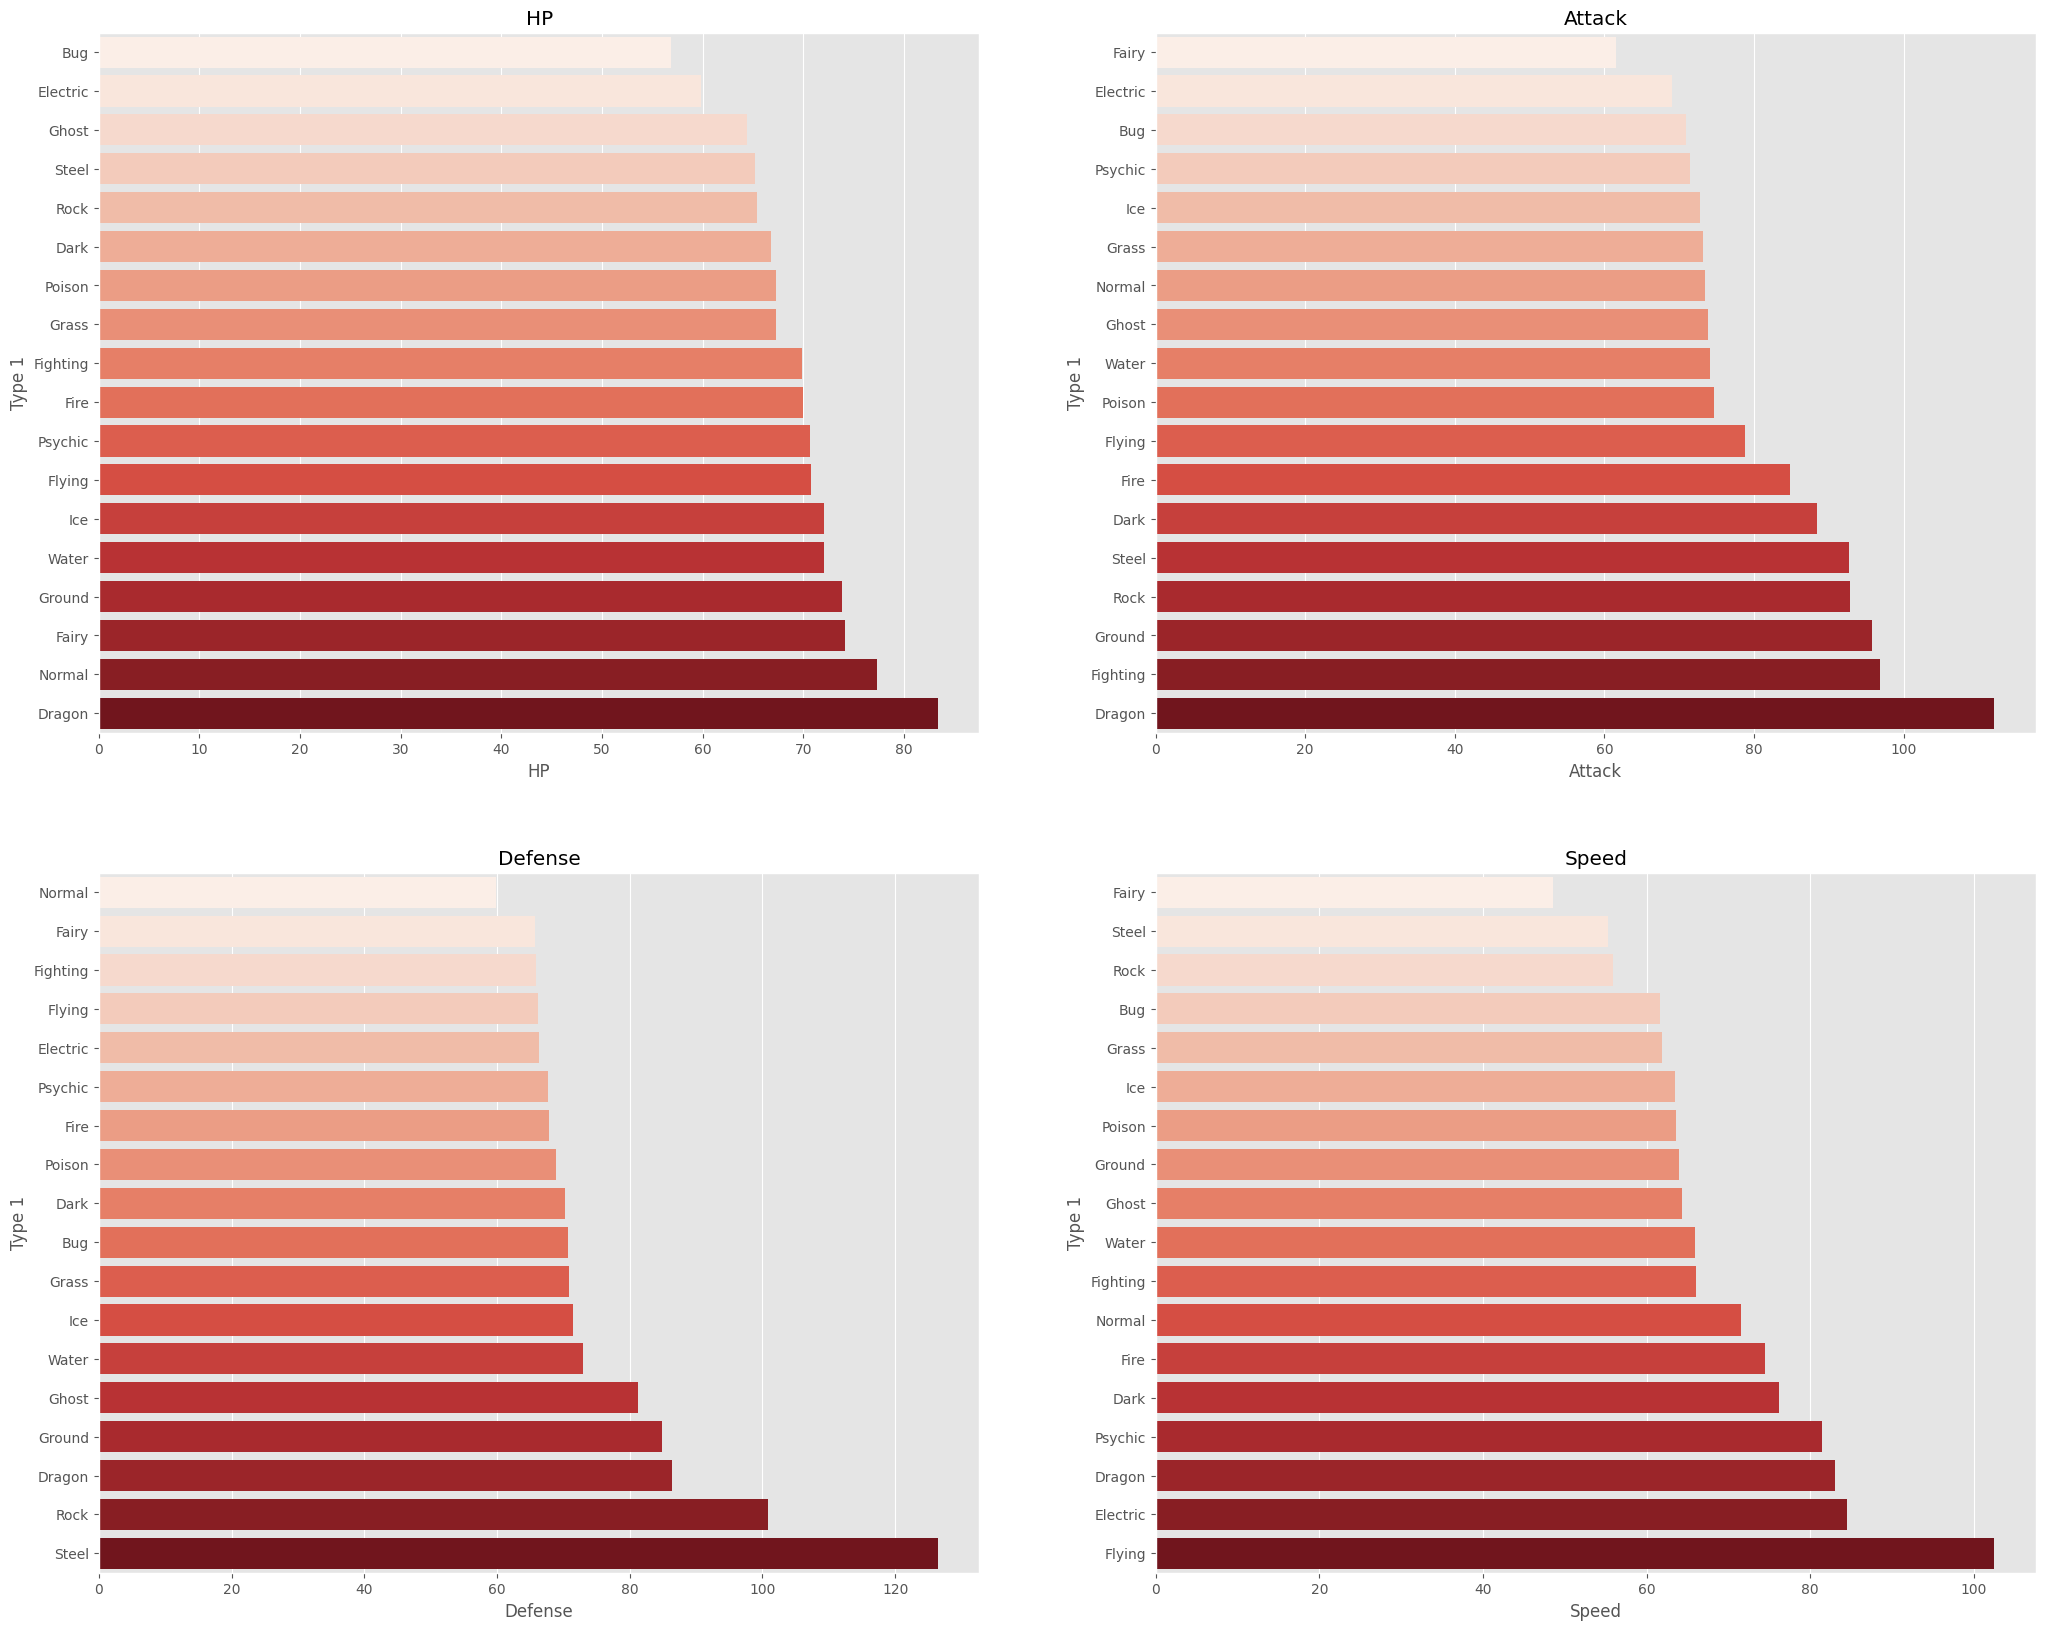

In [67]:
# Create barplots for Pokemon stats by type 1
plt.figure(figsize=(25, 20))

features = ['HP', 'Attack', 'Defense', 'Speed']
target = stats_avg['Type 1']

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    x = stats_avg[col]
    y = target
    sns.barplot(data=stats_avg, x=x, y=y, 
        order=stats_avg.sort_values(col)['Type 1'],
        palette="Reds")
    plt.title(col)
    plt.xlabel(col)

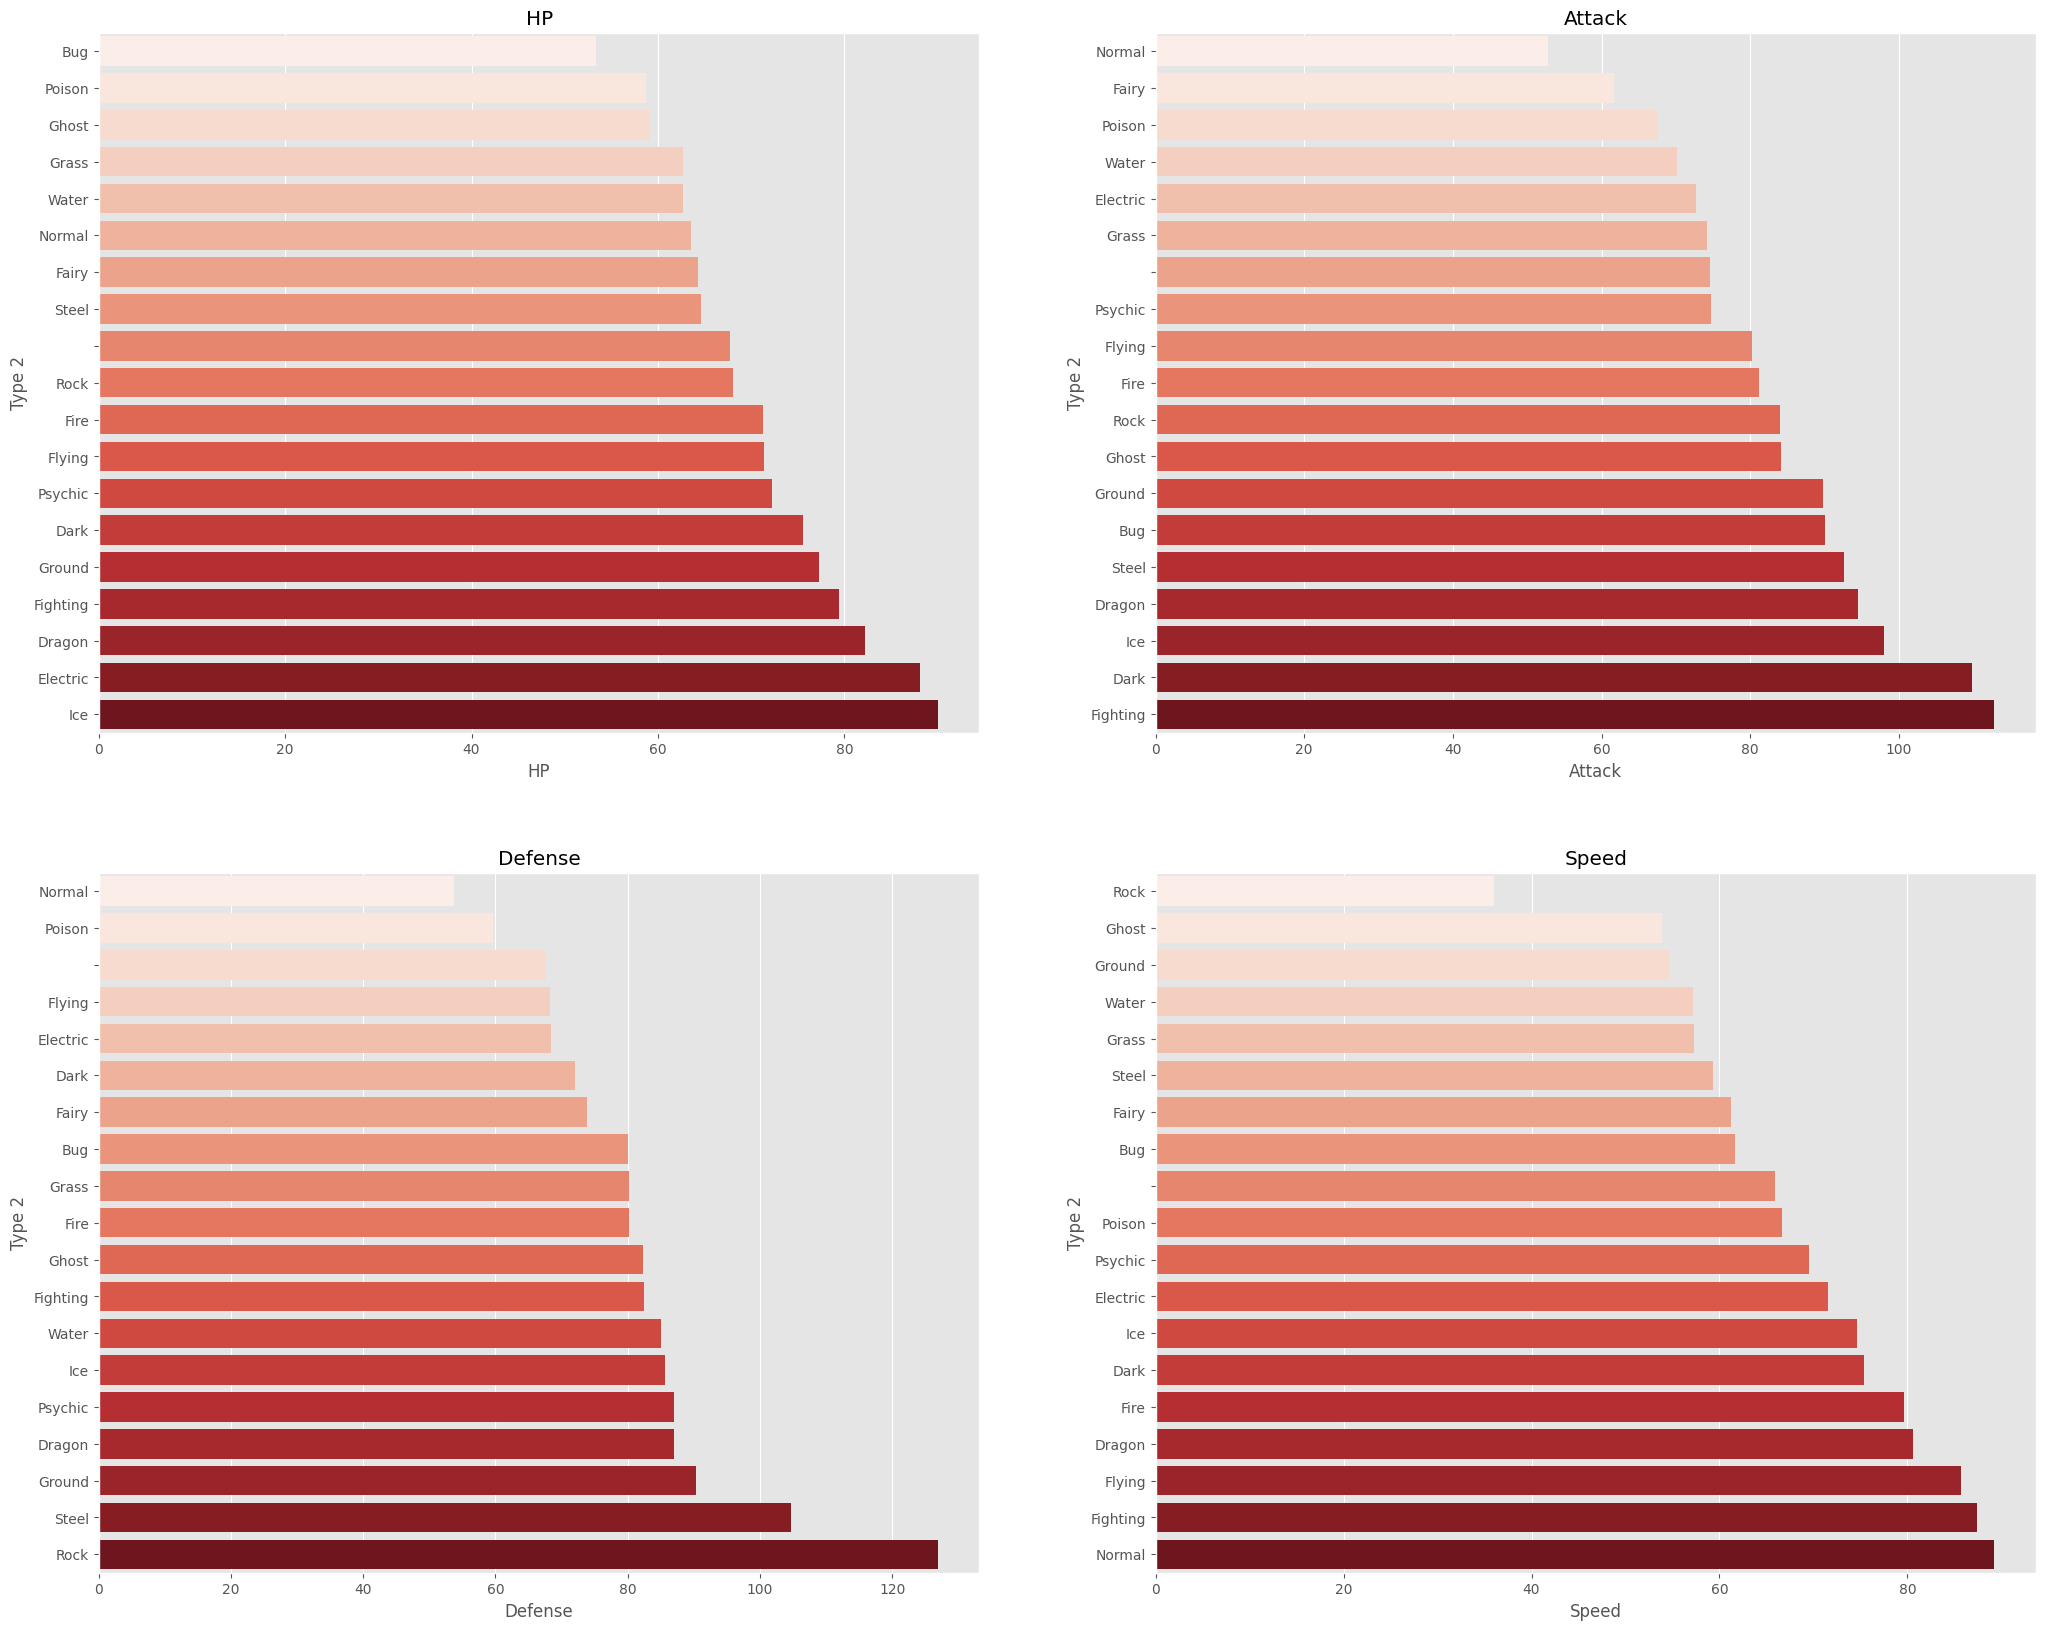

In [68]:
# Create barplots for Pokemon stats by type 2
plt.figure(figsize=(25, 20))

features = ['HP', 'Attack', 'Defense', 'Speed']
target = stats_avg_2['Type 2']

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    x = stats_avg_2[col]
    y = target
    sns.barplot(data=stats_avg_2, x=x, y=y, 
        order=stats_avg_2.sort_values(col)['Type 2'],
        palette="Reds")
    plt.title(col)
    plt.xlabel(col)

In [69]:
# Sort the Pokemon data by Attack stat in descending order
top_10_attack = pokemon_df.sort_values(by="Attack", ascending=False).head(10)

# Plot the top 10 attack pokemon

# Create a bar chart of the top 10 "Attack" Pokemon
fig = px.bar(top_10_attack, x="Attack", y="Name", text="Attack",
             title="Top 10 Attack Pokemon", labels={"Name": "Pokemon Name", "Attack": "Attack Stat"})
fig.update_layout(height=400, width=600)
fig.show()

In [70]:
# Filter the data for Generation 3
generation_3_data = pokemon_df[pokemon_df["Generation"] == 3]

# Sort by Attack stat in descending order
top_10_by_generation = generation_3_data.sort_values("Attack", ascending=False).head(10)

# Round Attack stat to 2 decimals
top_10_by_generation["Attack"] = top_10_by_generation["Attack"].round(2)

# Create a bar chart
fig = px.bar(top_10_by_generation, x="Name", y="Attack", text="Attack",
             title="Top 10 Attack Pokemon for Generation 3", labels={"Name": "Pokemon Name", "Attack": "Attack Stat"})
fig.update_layout(height=400, width=600)
fig.show()


In [71]:
# Filter the data for Pokemon with Legendary status set to True
top_10_legendary = pokemon_df[pokemon_df["Legendary"] == False].nlargest(10, "Attack")

# Round the Attack stat to 2 decimal places
top_10_legendary["Attack"] = top_10_legendary["Attack"].round(2)

# Create a bar chart of the top 10 Pokemon w/out Legendary status
fig = px.bar(top_10_legendary, x="Name", y="Attack", text="Attack",
             title="Top 10 Pokemon non-Legendary by Attack Stat",
             labels={"Name": "Pokemon Name", "Attack": "Attack Stat"})
fig.update_layout(width=600, height=500) 
fig.show()


### Predictive Analysis

#### Data Preprocessing

In [120]:
pokemon_df = pd.read_csv('data/pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [121]:
# Define our target and feature variables
X = pokemon_df.iloc[:,2:10]
y = pokemon_df.Legendary

In [122]:
# Create pipeline to preprocess and transform the categorical data
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="constant", fill_value="")),
        ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ]
)

In [123]:
# Create pipeline to preprocess and transform the numerical data
numerical_pipeline = Pipeline(
    steps=[
    ("inpute", SimpleImputer(strategy="mean")),
    ("StandardScaler", StandardScaler())
    ]
)

In [124]:
# Define the numerical and categorical data
cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns

In [125]:
# Define transformer
transformer = ColumnTransformer(
    transformers=[
    ("numeric", numerical_pipeline, num_cols),
    ("categorical", categorical_pipeline, cat_cols)
    ]
)

In [126]:
# Apply Processing
X = transformer.fit_transform(X)
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

In [127]:
# Create dictionary of models
models = {
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier()
    
}

In [128]:
# Store model result
model_results = []
model_names = []

# Train the models
for name,model in models.items():
    history = model.fit(X_train, y_train)
    preds = history.predict(X_test)
    score = accuracy_score(y_test, preds)
    model_results.append(score)
    model_names.append(name)
    
    # Create dataframe and print results
    df_results = pd.DataFrame([model_names, model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model', 1:'Accuracy'}).sort_values(by='Accuracy', ascending=False)
    
df_results

,Model,Accuracy
3,XGBClassifier,0.96
2,RandomForestClassifier,0.95
0,SVC,0.94
1,LogisticRegression,0.94


#### Hyperpareter tuning: XGBClassifier using GridSearchCV

In [134]:
# Define the hyperparameter grid
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

# Instantiate XGB Classifier
xgb_model = XGBClassifier(objective="binary:logistic",
                          random_state=42)

# Instantiate Grid Search
grid_cv = GridSearchCV(xgb_model,
                       param_grid,
                       n_jobs=-1,
                       cv=3,
                       scoring="roc_auc")

history = grid_cv.fit(X_train, y_train)

print("-"*100)
print("Best parameters found: ", grid_cv.best_params_)
print("Best ROC AUC Score found: ",(grid_cv.best_score_))

----------------------------------------------------------------------------------------------------
Best parameters found:  {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 4, 'reg_lambda': 0, 'scale_pos_weight': 5, 'subsample': 0.8}
Best ROC AUC Score found:  0.9818729789800185


In [136]:
# Train model using best parameters
xgb_model = XGBClassifier(**grid_cv.best_params_, random_state=42)

xgb_model.fit(X_train, y_train)
predicted = xgb_model.predict(X_test)
print(f'Accuracy Score = {accuracy_score(y_test, predicted)}')

Accuracy Score = 0.96


#### Model Evaluation

In [153]:
# Plot ROC Curve
fpr, tpr, thresh = roc_curve(y_test, predicted)

# Calculate ROC curve
fpr, tpr, thresh = roc_curve(y_test, predicted)

# Create ROC trace
roc_trace = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    line=dict(width=2, color='blue'),
    name='ROC curve'
)

# Create diagonal line
diag_trace = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(width=1, color='gray', dash='dash'),
    showlegend=False
)

# Create layout
layout = go.Layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate')
)

# Create figure
fig = go.Figure(data=[roc_trace, diag_trace], layout=layout)

# Show plot
fig.show()

roc_auc = roc_auc_score(y_test, predicted)
print(f"ROC AUC Score: {roc_auc:.3f}")


ROC AUC Score: 0.943
